In [1]:
# credit card risk Analysis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

data=pd.read_csv("credit_risk_dataset.csv")


In [2]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
data= data.dropna(axis=0)

In [5]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
#Removing outliers
data = data[data["person_age"]<=100]
data = data[data["person_emp_length"]<=100]
data = data[data["person_income"]<= 4000000]

In [7]:
#Percentage of non-default cases
data_0 = data[data.loan_status == 0].loan_status.count() / data.loan_status.count()
data_0

0.7833892148644873

In [8]:
 import plotly.express as px

# Create a box plot
fig = px.box(
    data, 
    x="loan_grade", 
    y="loan_percent_income", 
    color="loan_status",
    color_discrete_sequence=px.colors.qualitative.Dark24,
    labels={col: col.replace('_', ' ') for col in data.columns},
    category_orders={"loan_grade": ["A", "B", "C", "D", "E", "F", "G"]}
)

# Update layout for legend positioning
fig.update_layout(
    legend=dict(
        orientation="h", 
        yanchor="bottom",
        y=1.02, 
        xanchor="right", 
        x=1
    )
)

# Show the plot
fig.show()


In [9]:
pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv('dataset_with_credit_scores.csv')  # Assuming you have this CSV file

# Define features and target
X = data[['person_age', 'person_income', 'person_home_ownership', 'loan_amnt', 
        'loan_int_rate', 'person_emp_length', 'loan_grade', 
        'loan_percent_income', 'cb_person_default_on_file', 
        'cb_person_cred_hist_length']]
y = data['loan_status']  # Assuming 1 for default and 0 for non-default

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = ['person_age', 'person_income', 'loan_amnt', 
                    'loan_int_rate', 'person_emp_length', 
                    'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_grade', 
                        'cb_person_default_on_file']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Define the model pipeline
model = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Add SMOTE here
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Add predictions and probabilities to the original dataset
data['default_probability'] = model.predict_proba(X)[:, 1]
data['credit_score'] = 300 + (550 * (1 - data['default_probability']))

# Save the modified DataFrame to a new CSV file
data.to_csv('dataset_with_credit_scores.csv', index=False)

print("Credit score column added and saved to 'dataset_with_credit_scores.csv'")

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Credit score column added and saved to 'dataset_with_credit_scores.csv'


In [14]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,default_probability,credit_score
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.048172,823.505250
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.993493,303.578878
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.865711,373.859160
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.890340,360.313049
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.147347,768.959011


In [15]:
data1=pd.read_csv('dataset_with_credit_scores.csv')

In [16]:
data1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,default_probability,credit_score
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.048172,823.505250
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.993493,303.578878
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.865711,373.859160
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.890340,360.313049
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.147347,768.959011


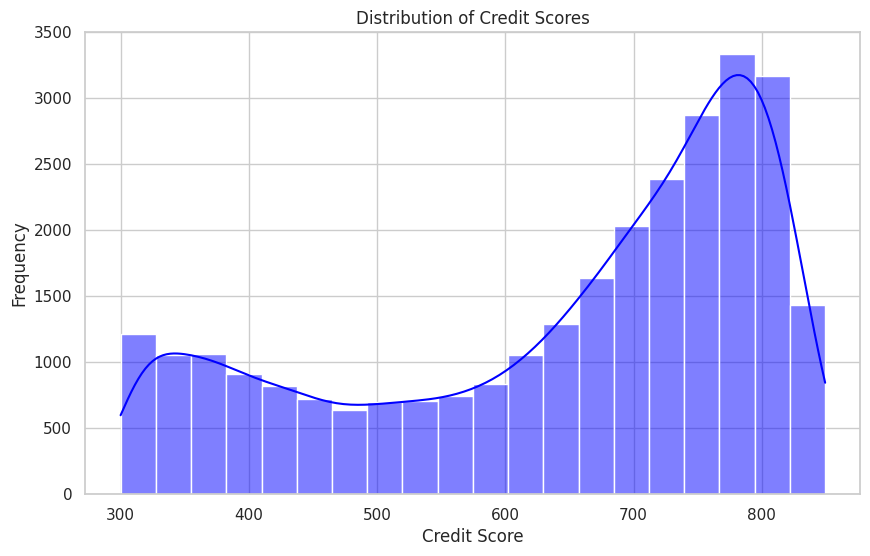

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Distribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['credit_score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

 
 
 


In [20]:
 import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv('dataset_with_credit_scores.csv')

# Example Data Preparation:
# Aggregate loan amounts by loan grade
agg_data = df.groupby('loan_grade')['loan_amnt'].sum().reset_index()

# Sort data (if necessary)
agg_data = agg_data.sort_values(by='loan_amnt', ascending=False)

# Prepare data for Waterfall chart
categories = agg_data['loan_grade'].tolist()
values = agg_data['loan_amnt'].tolist()

# Create Waterfall chart
fig = go.Figure(go.Waterfall(
    name = "Loan Amount Analysis", orientation = "v",
    measure = ["relative"] * len(categories) + ["total"],
    x = categories + ["Total"],
    textposition = "outside",
    text = ["+" + str(val) for val in values] + ["Total"],
    y = values + [sum(values)],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
    title = "Loan Amount Breakdown by Loan Grade",
    showlegend = True
)

fig.show()


In [21]:
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv('dataset_with_credit_scores.csv')

# Example Data Preparation:
# Aggregate loan amounts by loan grade and loan status
agg_data = df.groupby(['loan_grade', 'loan_status'])['loan_amnt'].sum().reset_index()

# Create a mapping of loan grades and statuses to indices
loan_grades = agg_data['loan_grade'].unique().tolist()
loan_statuses = agg_data['loan_status'].unique().tolist()
nodes = loan_grades + loan_statuses
node_dict = {node: idx for idx, node in enumerate(nodes)}

# Prepare source and target indices for the Sankey diagram
sources = []
targets = []
values = []

for _, row in agg_data.iterrows():
    source = row['loan_grade']
    target = row['loan_status']
    value = row['loan_amnt']
    
    sources.append(node_dict[source])
    targets.append(node_dict[target])
    values.append(value)

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(
    title_text="Sankey Diagram of Loan Amounts by Loan Grade and Status",
    font_size=10
)

fig.show()


In [23]:
 import plotly.express as px

# Select relevant dimensions for the parallel categories diagram
dimensions = [
    'person_home_ownership',  # Categorical
    'loan_intent',            # Categorical
    'loan_grade',             # Categorical
    'cb_person_default_on_file'  # Categorical (assuming this indicates a historical default)
]

# Create the parallel categories diagram
fig = px.parallel_categories(
    data,
    dimensions=dimensions,
    color="loan_status",  # Adjust this if 'loan_status' is a categorical variable
    color_continuous_scale=px.colors.sequential.RdBu,
    labels={col: col.replace('_', ' ') for col in data.columns}
)

# Show the plot
fig.show()


In [24]:
import plotly.express as px
fig = px.pie(data, names='loan_grade', values='loan_amnt', title='Proportion of Loan Amount by Loan Grade')
fig.show()


In [25]:
# Example: Create a pivot table for the heatmap
heatmap_data = data.pivot_table(index='loan_grade', columns='loan_status', values='loan_amnt', aggfunc='sum')

fig = px.imshow(heatmap_data, text_auto=True, color_continuous_scale='Viridis',
                title='Heatmap of Loan Amount by Loan Grade and Status')
fig.show()

In [26]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 12.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Logistic Regression ROC-AUC Score: 0.8638616957119613
/root/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[12:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


XGBoost ROC-AUC Score: 0.9249720625306358


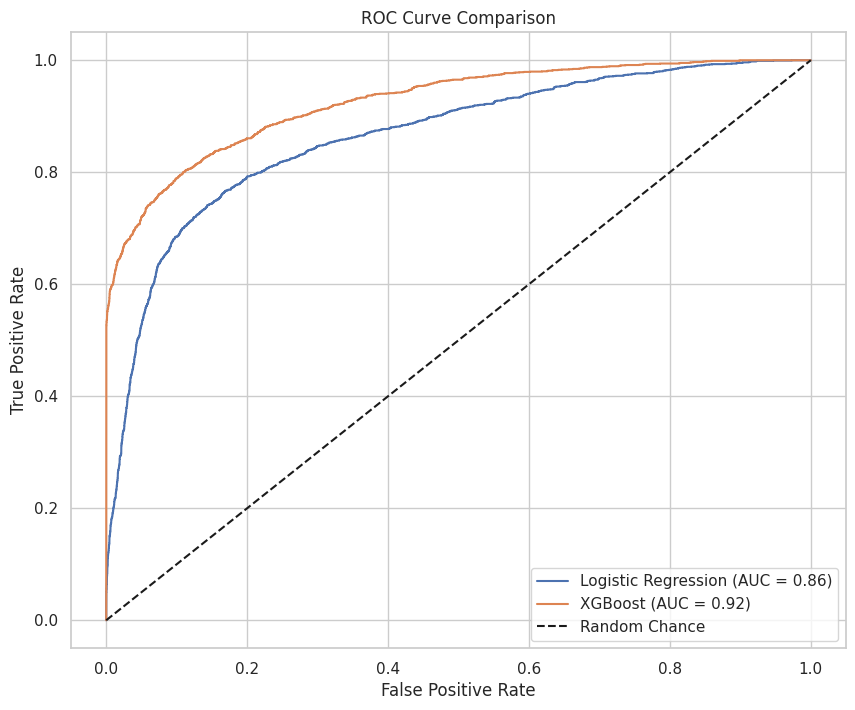

Predicted risk column added and saved to 'dataset_with_predictions.csv'


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv('dataset_with_credit_scores.csv')  # Assuming you saved your CSV file

# Define features and target
X = df[['person_age', 'person_income', 'person_home_ownership', 'loan_amnt', 
        'loan_int_rate', 'person_emp_length', 'loan_grade', 
        'loan_percent_income', 'cb_person_default_on_file', 
        'cb_person_cred_hist_length']]
y = df['loan_status']  # Assuming 1 for default and 0 for non-default

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = ['person_age', 'person_income', 'loan_amnt', 
                    'loan_int_rate', 'person_emp_length', 
                    'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_grade', 
                        'cb_person_default_on_file']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Create pipelines for each model with SMOTE
logistic_pipeline = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

xgboost_pipeline = imPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Dictionary to hold pipelines and their names
pipelines = {
    'Logistic Regression': logistic_pipeline,
    'XGBoost': xgboost_pipeline
}

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"{name} ROC-AUC Score: {roc_auc}")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Optionally, you can choose the best model and predict on the entire dataset
# Assuming XGBoost performed the best in this example
best_model_pipeline = xgboost_pipeline  # or change to the model with the highest AUC score
df['predicted_risk'] = best_model_pipeline.predict(X)
df['default_probability'] = best_model_pipeline.predict_proba(X)[:, 1]
# Save the modified DataFrame to a new CSV file
df.to_csv('dataset_with_predictions.csv', index=False)
print("Predicted risk column added and saved to 'dataset_with_predictions.csv'")


In [28]:
df2=pd.read_csv('dataset_with_predictions.csv')
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,default_probability,credit_score,predicted_risk
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.036470,823.505250,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.999228,303.578878,1
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.998838,373.859160,1
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.997841,360.313049,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.995480,768.959011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28621,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0.178013,728.836690,0
28622,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0.001575,820.387279,0
28623,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0.997353,563.915719,1
28624,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0.015767,809.541533,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11c7b200-6926-48cd-b92a-3355ffb8ccc8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>